### 3-Sigma Technique(Standard Deviation)

In [20]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [38]:
data=pd.read_csv('melb_data.csv')

In [39]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [40]:
def find_anomalies(data):
    anomalies=[]

    data_std=statistics.stdev(data)
    data_mean=statistics.mean(data)

    anomaly_cut_off=data_std*3

    lower_limit=data_mean-anomaly_cut_off
    upper_limit=data_mean+anomaly_cut_off

    for outlier in data:
        if outlier < lower_limit or outlier > upper_limit:
            anomalies.append(outlier)

    return anomalies



In [42]:
list_1=find_anomalies(data['Price'])

In [43]:
len(list_1)

232

In [44]:
len(data)

13580

In [45]:
data.Price.skew()

np.float64(2.239624312529873)

In [46]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Density'>

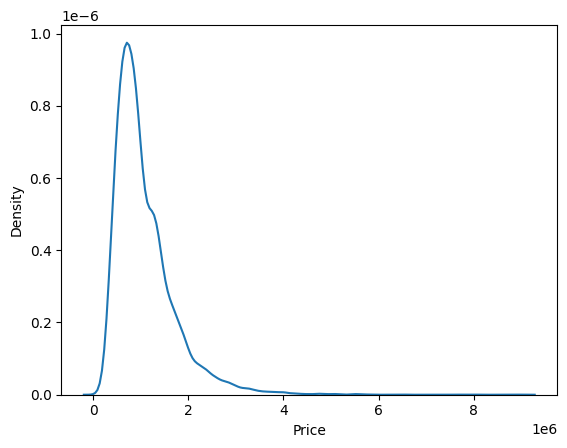

In [47]:
sns.kdeplot(data.Price)

In [48]:
data['price_transformed']=np.log(data.Price)

In [49]:
data.price_transformed.skew()

np.float64(0.18065988655954393)

In [51]:
list_2=find_anomalies(data.price_transformed)


In [52]:
len(list_2)

41

<Axes: xlabel='price_transformed', ylabel='Density'>

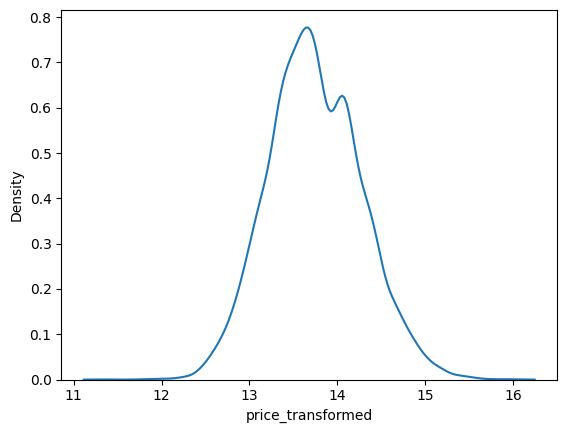

In [53]:
sns.kdeplot(data.price_transformed)

In [54]:
data['price_transformed_double']=np.log(data.price_transformed)
data['price_transformed_double'].skew()

np.float64(0.06772528165815256)

In [63]:
list_3=find_anomalies(data.price_transformed_double)

In [64]:
len(list_3)

33

In [57]:
len(data)

13580

<Axes: xlabel='price_transformed_double', ylabel='Density'>

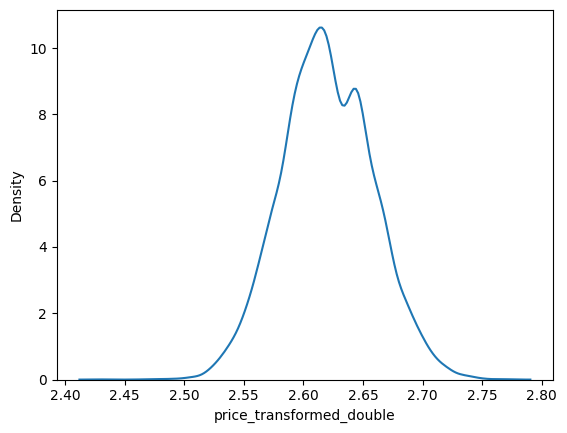

In [65]:
sns.kdeplot(data.price_transformed_double)

<Axes: >

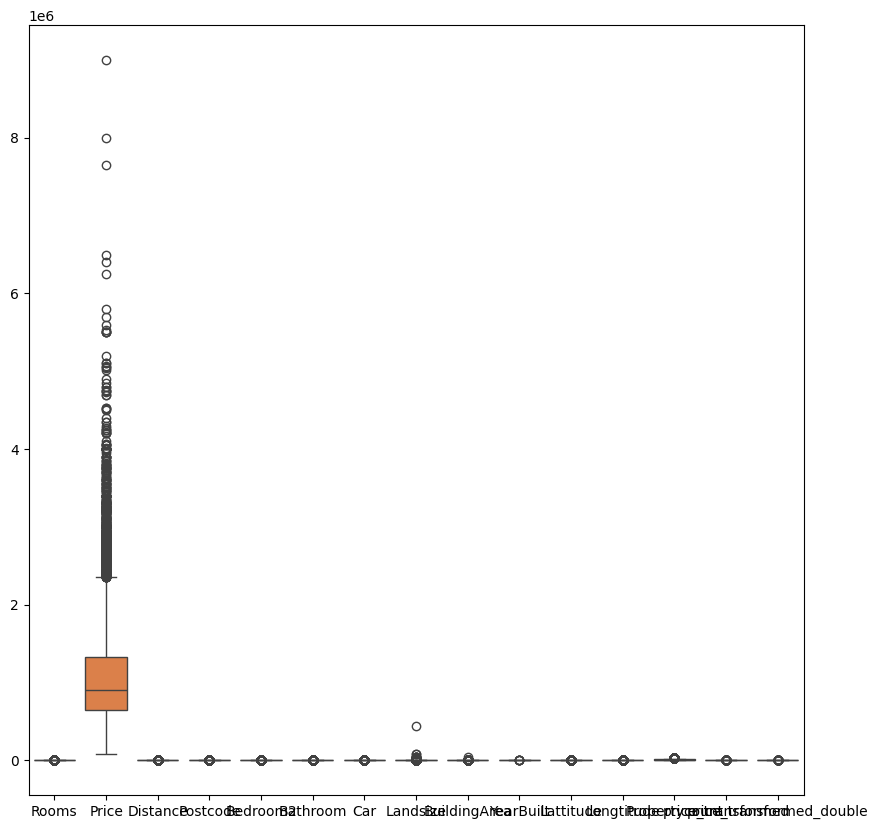

In [61]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data)

In [62]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,price_transformed,price_transformed_double
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378,13.745376,2.619970
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772,0.526786,0.038262
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,11.350407,2.429254
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000,13.384728,2.594114
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000,13.713478,2.618379
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000,14.100690,2.646224
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,16.012735,2.773384


### Inter Quartile Range
IQR = Q3 - Q1

In [66]:
list1=[43,45,32,65,64,67,34,68,69,54,70,73,76,74,78,89,78,89,95,96,98,99,99,56,62]

In [67]:
len(list1)

25

In [68]:
max(list1)

99

In [69]:
min(list1)

32

In [71]:
statistics.mean(list1)

70.92

In [72]:
sorted(list1)

[32,
 34,
 43,
 45,
 54,
 56,
 62,
 64,
 65,
 67,
 68,
 69,
 70,
 73,
 74,
 76,
 78,
 78,
 89,
 89,
 95,
 96,
 98,
 99,
 99]

In [73]:
len(list1)

25

20th percentile : (20/100)25=5(index)  56
